## Volkswagen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
from statsmodels.tsa.api import VAR
from arch import arch_model
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')
import yfinance
sns.set()

In [2]:
raw_data = yfinance.download(tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = "ticker", 
                             auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [3]:
df = raw_data.copy()

## Defining Key Dates

In [4]:
start_date = '2009-04-05'

#First official aanouncement-49.9%
ann_1 = '2009-12-09'

#Second official aanouncement-51.1%
ann_2 = '2012-07-05'

#End_date
end_date = '2014-01-01'

# Dieselgate
d_gate = '2015-09-20'

## Pre-processing the Data

In [5]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_ret_vol'] = df['ret_vol'].mul(df.ret_vol)
df['sq_ret_por'] = df['ret_por'].mul(df.ret_por)
df['sq_ret_bmw'] = df['ret_bmw'].mul(df.ret_bmw)

# Extracting vol(quantity of purchases or sales each day)
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [6]:
df = df.asfreq('b')
df = df.fillna(method = 'bfill')

In [7]:
# removing surplus columns
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting Prices

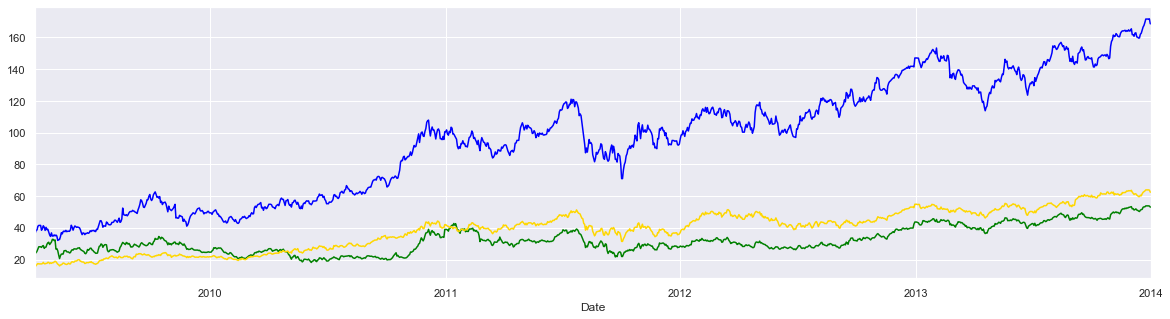

In [8]:
df['vol'][start_date:end_date].plot(figsize = (20,5), color = 'blue')
df['por'][start_date:end_date].plot(color = 'green')
df['bmw'][start_date:end_date].plot(color = 'gold')
plt.show();

#### If we plot the data using the different shades of blue, green and gold

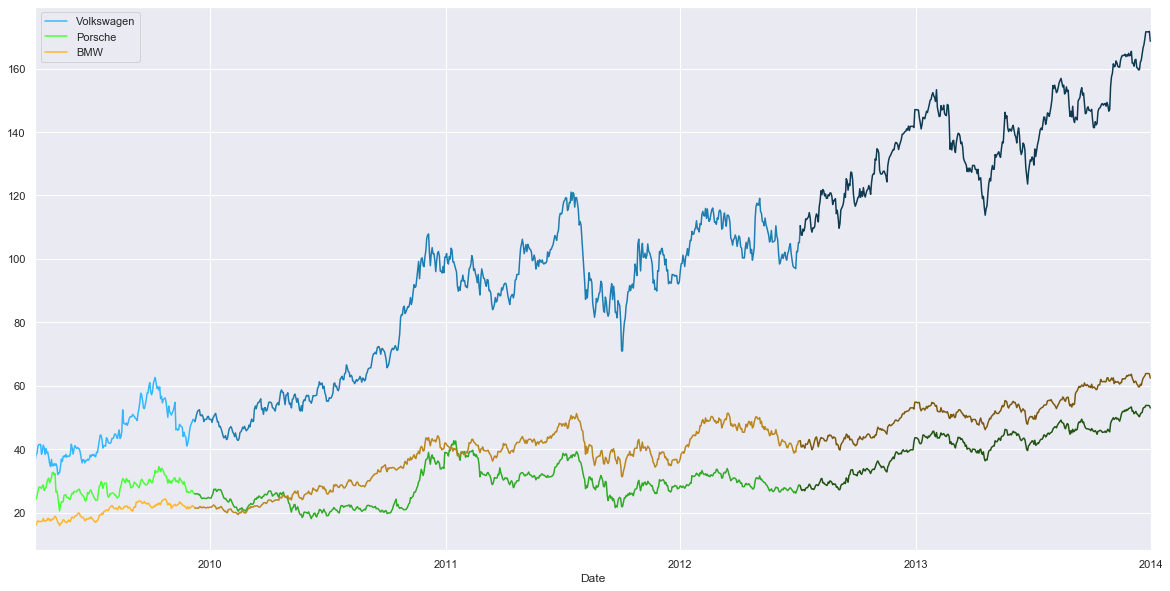

In [9]:
df['vol'][start_date:ann_1].plot(figsize = (20,10), color = '#33B8FF')
df['por'][start_date:ann_1].plot(color = '#49FF3A')
df['bmw'][start_date:ann_1].plot(color = '#FEB628')

df['vol'][ann_1:ann_2].plot(color = '#1E7EB2')
df['por'][ann_1:ann_2].plot(color = '#2FAB25')
df['bmw'][ann_1:ann_2].plot(color = '#BA861F')

df['vol'][ann_2:end_date].plot(color = '#0E3A52')
df['por'][ann_2:end_date].plot(color = '#225414')
df['bmw'][ann_2:end_date].plot(color = '#7C5913')

plt.legend(['Volkswagen', 'Porsche', 'BMW'])
plt.show();

## Correlation

In [10]:
print('Correlation among manufracturers from ' +str(start_date)+ 'to' +str(end_date)+ '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufracturers from 2009-04-05to2014-01-01

Volkswagen and Porsche Correlation: 	0.8348050084649205
Volkswagen and BMW Correlation: 	0.979938452554667
Porsche and BMW Correlation: 		0.803939853865535


In [11]:
print('Correlation among manufracturers from ' +str(start_date)+ 'to' +str(ann_1)+ '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufracturers from 2009-04-05to2009-12-09

Volkswagen and Porsche Correlation: 	0.6633400945227693
Volkswagen and BMW Correlation: 	0.8428353828601811
Porsche and BMW Correlation: 		0.6095046037466965


In [12]:
print('Correlation among manufracturers from ' +str(ann_1)+ 'to' +str(ann_2)+ '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufracturers from 2009-12-09to2012-07-05

Volkswagen and Porsche Correlation: 	0.7422114342529966
Volkswagen and BMW Correlation: 	0.9795943008992951
Porsche and BMW Correlation: 		0.7035985533162735


In [13]:
print('Correlation among manufracturers from ' +str(ann_2)+ 'to' +str(end_date)+ '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufracturers from 2012-07-05to2014-01-01

Volkswagen and Porsche Correlation: 	0.9405237308477341
Volkswagen and BMW Correlation: 	0.9284447459439158
Porsche and BMW Correlation: 		0.94941117662131


In [14]:
print('Correlation among manufracturers from ' +str(end_date)+ 'to' +str(df.index[-1])+ '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufracturers from 2014-01-01to2020-10-28 00:00:00

Volkswagen and Porsche Correlation: 	0.9415854217864761
Volkswagen and BMW Correlation: 	0.5225698933189338
Porsche and BMW Correlation: 		0.470577971159666


In [15]:
# Diesel Gate Scandal 
print('Correlation among manufracturers from ' +str(d_gate)+ ' to ' +str(df.index[-1])+ '\n')
print('Volkswagen and Porsche Correlation: \t' + str(df['vol'][d_gate:].corr(df['por'][d_gate:])))
print('Volkswagen and BMW Correlation: \t' + str(df['vol'][d_gate:].corr(df['bmw'][d_gate:])))
print('Porsche and BMW Correlation: \t\t' + str(df['por'][d_gate:].corr(df['bmw'][d_gate:])))

Correlation among manufracturers from 2015-09-20 to 2020-10-28 00:00:00

Volkswagen and Porsche Correlation: 	0.9789516452505054
Volkswagen and BMW Correlation: 	0.3188054390895639
Porsche and BMW Correlation: 		0.3294937631794387


# Best Fitting Models

## For Volkswagen

In [16]:
model_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[["por", "bmw"]][start_date:ann_1], m = 5, 
                          max_p = 5, max_q = 5)
model_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[["por", "bmw"]][ann_1:ann_2], m = 5, 
                          max_p = 5, max_q = 5)
model_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[["por", "bmw"]][ann_2:end_date], m = 5, 
                          max_p = 5, max_q = 5)

In [17]:
model_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -323.195
Date:                Wed, 28 Oct 2020   AIC                            656.390
Time:                        15:54:56   BIC                            672.299
Sample:                    04-06-2009   HQIC                           662.841
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7236      0.447      1.618      0.106      -0.153       1.600
por            0.4179      0.100      4.169      0.000       0.221       0.614
bmw            0.6615      0.314      2.108      0.035       0.046       1.277
ar.L1          0.9634      0.020     48.675      0.000       0.925       1.002
sigma2         2.1787      0.148     14.718      0.000       1.889       2.469
===================================================================================
Ljung-Box (Q):                       38.25   Jarque-Bera (JB):               166.09
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.52
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
model_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1080.895
Date:                Wed, 28 Oct 2020   AIC                           2167.789
Time:                        15:54:56   BIC                           2181.315
Sample:                    12-09-2009   HQIC                          2173.028
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.8277      0.064     12.833      0.000       0.701       0.954
bmw            1.4806      0.070     21.267      0.000       1.344       1.617
sigma2         1.4680      0.060     24.528      0.000       1.351       1.585
===================================================================================
Ljung-Box (Q):                       33.73   Jarque-Bera (JB):               112.32
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -608.235
Date:                Wed, 28 Oct 2020   AIC                           1222.471
Time:                        15:54:56   BIC                           1234.362
Sample:                    07-05-2012   HQIC                          1227.185
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.7999      0.059     30.369      0.000       1.684       1.916
bmw            0.8197      0.087      9.381      0.000       0.648       0.991
sigma2         1.3355      0.065     20.461      0.000       1.208       1.463
===================================================================================
Ljung-Box (Q):                       28.08   Jarque-Bera (JB):               103.80
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.39
Prob(H) (two-sided):                  0.15   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## For Porsche

In [20]:
model_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[["vol", "bmw"]][start_date:ann_1], m = 5, 
                          max_p = 5, max_q = 5)
model_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[["vol", "bmw"]][ann_1:ann_2], m = 5, 
                          max_p = 5, max_q = 5)
model_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[["vol", "bmw"]][ann_2:end_date], m = 5, 
                          max_p = 5, max_q = 5)

In [21]:
model_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -218.214
Date:                Wed, 28 Oct 2020   AIC                            448.427
Time:                        15:55:37   BIC                            467.518
Sample:                    04-06-2009   HQIC                           456.169
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5516      0.360      1.533      0.125      -0.154       1.257
vol            0.1101      0.051      2.157      0.031       0.010       0.210
bmw            0.8068      0.145      5.557      0.000       0.522       1.091
ar.L1          1.0747      0.059     18.194      0.000       0.959       1.191
ar.L2         -0.1589      0.059     -2.716      0.007      -0.274      -0.044
sigma2         0.6721      0.048     14.098      0.000       0.579       0.766
===================================================================================
Ljung-Box (Q):                       26.01   Jarque-Bera (JB):               559.43
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -550.899
Date:                Wed, 28 Oct 2020   AIC                           1111.797
Time:                        15:55:37   BIC                           1134.341
Sample:                    12-09-2009   HQIC                          1120.529
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1704      0.015     11.128      0.000       0.140       0.200
bmw            0.3030      0.042      7.206      0.000       0.221       0.385
ar.L1          0.6598      0.229      2.883      0.004       0.211       1.108
ma.L1         -0.5910      0.245     -2.412      0.016      -1.071      -0.111
sigma2         0.3024      0.009     32.415      0.000       0.284       0.321
===================================================================================
Ljung-Box (Q):                       33.39   Jarque-Bera (JB):              1076.71
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  390
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood                -192.826
Date:                             Wed, 28 Oct 2020   AIC                            393.653
Time:                                     15:55:37   BIC                            409.507
Sample:                                 07-05-2012   HQIC                           399.938
                                      - 01-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2119      0.013     16.876      0.000       0.187       0.237
bmw            0.2286      0.038      6.036      0.000       0.154       0.303
ma.S.L5       -0.1249      0.057     -2.210      0.027      -0.236      -0.014
sigma2         0.1578      0.006     27.851      0.000       0.147       0.169
===================================================================================
Ljung-Box (Q):                       34.49   Jarque-Bera (JB):               613.58
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## For Returns

In [24]:
model_ret_pre_vol = auto_arima(df.ret_vol[start_date:ann_1], exogenous = df[["ret_por", "ret_bmw"]][start_date:ann_1], 
                               m = 5, max_p = 5, max_q = 5)
model_ret_btn_vol = auto_arima(df.ret_vol[ann_1:ann_2], exogenous = df[["ret_por", "ret_bmw"]][ann_1:ann_2], 
                               m = 5, max_p = 5, max_q = 5)
model_ret_post_vol = auto_arima(df.ret_vol[ann_2:end_date], exogenous = df[["ret_por", "ret_bmw"]][ann_2:end_date],
                                m = 5, max_p = 5, max_q = 5)

In [25]:
model_ret_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        SARIMAX   Log Likelihood                -464.578
Date:                Wed, 28 Oct 2020   AIC                            935.156
Time:                        15:55:50   BIC                            944.702
Sample:                    04-06-2009   HQIC                           939.027
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.2657      0.057      4.625      0.000       0.153       0.378
ret_bmw        0.1920      0.114      1.681      0.093      -0.032       0.416
sigma2        10.8277      0.754     14.366      0.000       9.350      12.305
===================================================================================
Ljung-Box (Q):                       34.90   Jarque-Bera (JB):                64.38
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.29
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model_ret_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:                        SARIMAX   Log Likelihood               -1222.937
Date:                Wed, 28 Oct 2020   AIC                           2451.873
Time:                        15:55:50   BIC                           2465.404
Sample:                    12-09-2009   HQIC                          2457.114
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.2900      0.025     11.832      0.000       0.242       0.338
ret_bmw        0.5844      0.034     17.388      0.000       0.519       0.650
sigma2         2.2296      0.092     24.225      0.000       2.049       2.410
===================================================================================
Ljung-Box (Q):                       39.90   Jarque-Bera (JB):                82.78
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
model_ret_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  390
Model:                        SARIMAX   Log Likelihood                -522.637
Date:                Wed, 28 Oct 2020   AIC                           1051.274
Time:                        15:55:50   BIC                           1063.172
Sample:                    07-05-2012   HQIC                          1055.991
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_por        0.4877      0.019     25.060      0.000       0.450       0.526
ret_bmw        0.3502      0.035      9.970      0.000       0.281       0.419
sigma2         0.8541      0.033     25.753      0.000       0.789       0.919
===================================================================================
Ljung-Box (Q):                       24.89   Jarque-Bera (JB):               388.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
## Porsche
model_ret_pre_por = auto_arima(df.ret_por[start_date:ann_1], exogenous = df[["ret_vol", "ret_bmw"]][start_date:ann_1], 
                               m = 5, max_p = 5, max_q = 5)
model_ret_btn_por = auto_arima(df.ret_por[ann_1:ann_2], exogenous = df[["ret_vol", "ret_bmw"]][ann_1:ann_2], 
                               m = 5, max_p = 5, max_q = 5)
model_ret_post_por = auto_arima(df.ret_por[ann_2:end_date], exogenous = df[["ret_vol", "ret_bmw"]][ann_2:end_date],
                                m = 5, max_p = 5, max_q = 5)

In [29]:
model_ret_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:                        SARIMAX   Log Likelihood                -453.959
Date:                Wed, 28 Oct 2020   AIC                            913.918
Time:                        15:56:12   BIC                            923.463
Sample:                    04-06-2009   HQIC                           917.789
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_vol        0.2358      0.077      3.051      0.002       0.084       0.387
ret_bmw        0.6074      0.093      6.515      0.000       0.425       0.790
sigma2         9.6099      0.527     18.242      0.000       8.577      10.642
===================================================================================
Ljung-Box (Q):                       34.99   Jarque-Bera (JB):               325.36
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model_ret_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1393.113
Date:                Wed, 28 Oct 2020   AIC                           2794.227
Time:                        15:56:13   BIC                           2812.268
Sample:                    12-09-2009   HQIC                          2801.214
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_vol        0.4871      0.047     10.337      0.000       0.395       0.579
ret_bmw        0.4720      0.053      8.857      0.000       0.368       0.576
ar.L1          0.1377      0.026      5.347      0.000       0.087       0.188
sigma2         3.6997      0.120     30.705      0.000       3.463       3.936
===================================================================================
Ljung-Box (Q):                       25.12   Jarque-Bera (JB):               530.36
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.03
Prob(H) (two-sided):                  0.49   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
model_ret_post_por.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                  390
Model:             SARIMAX(1, 0, 0, 5)   Log Likelihood                -575.707
Date:                 Wed, 28 Oct 2020   AIC                           1159.413
Time:                         15:56:13   BIC                           1175.278
Sample:                     07-05-2012   HQIC                          1165.702
                          - 01-01-2014                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ret_vol        0.6315      0.034     18.734      0.000       0.565       0.698
ret_bmw        0.3644      0.044      8.372      0.000       0.279       0.450
ar.S.L5       -0.1107      0.048     -2.302      0.021      -0.205      -0.016
sigma2         1.1211      0.038     29.729      0.000       1.047       1.195
===================================================================================
Ljung-Box (Q):                       37.69   Jarque-Bera (JB):               911.49
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions For Future

### For Porsche

In [32]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = 'ct')

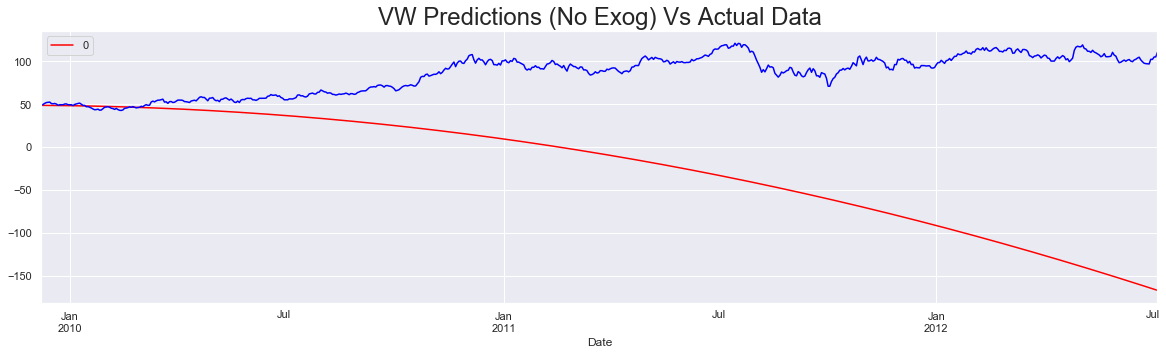

In [33]:
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (No Exog) Vs Actual Data", size = 24)
plt.show()

### For Volkswagen

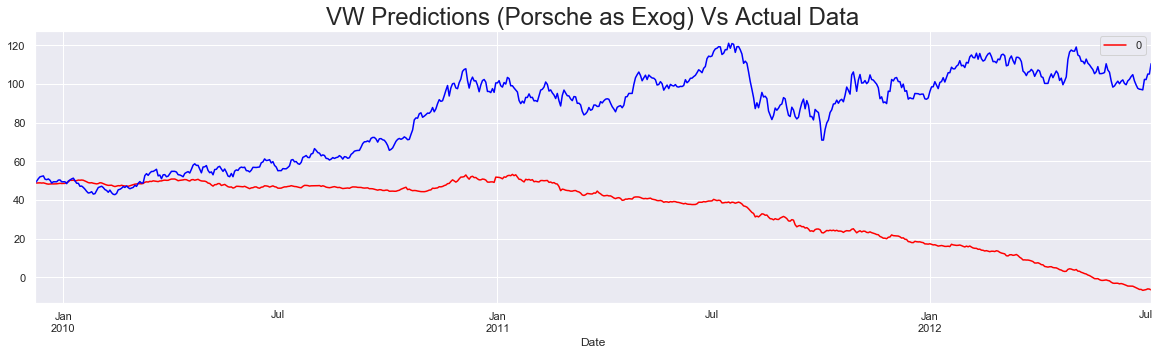

In [34]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                                m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = 'ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) Vs Actual Data", size = 24)
plt.show()

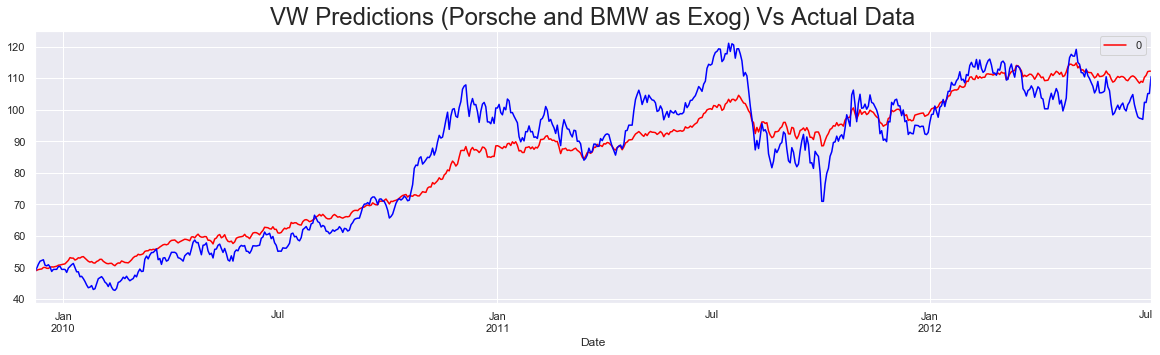

In [35]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                                m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = 'ct')

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and BMW as Exog) Vs Actual Data", size = 24)
plt.show()

## Volatility

### Volatility of VW for Each Period

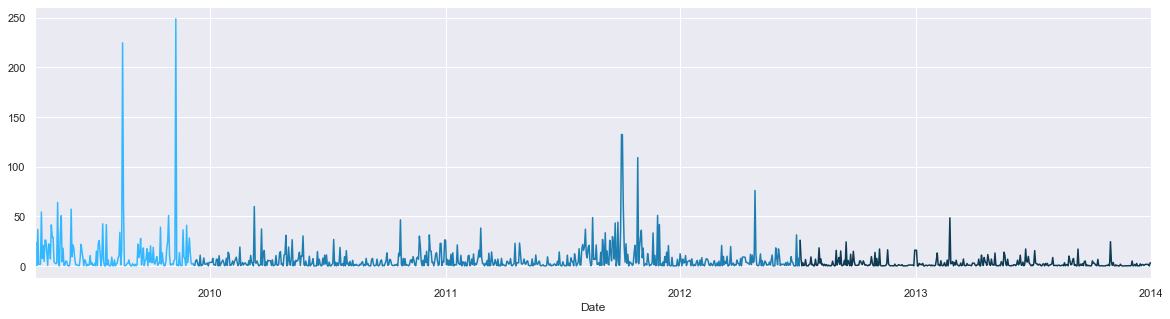

In [36]:
df['sq_ret_vol'][start_date:ann_1].plot(figsize = (20,5), color = '#33B8FF');
df['sq_ret_vol'][ann_1:ann_2].plot(color = '#1E7EB2');
df['sq_ret_vol'][ann_2:end_date].plot(color = '#0E3A52');

## Volatility trends for each period

In [37]:
mod_pre_garch = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant", vol = "Garch", p = 1, q = 1)
result_pre_garch = mod_pre_garch.fit(update_freq = 5)

mod_btn_garch = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant", vol = "Garch", p = 1, q = 1)
result_btn_garch = mod_btn_garch.fit(update_freq = 5)

mod_post_garch = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant", vol = "Garch", p = 1, q = 1)
result_post_garch = mod_post_garch.fit(update_freq = 5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 475.8105735834762
Iteration:     10,   Func. Count:     65,   Neg. LLF: 475.03020636662154
Iteration:     15,   Func. Count:     95,   Neg. LLF: 474.9914344762632
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 474.99143442395825
            Iterations: 15
            Function evaluations: 95
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1526.922779732486
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1526.7316357715022
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1526.731635770258
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     38,   Neg. LLF: 724.5620989527301
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 724.5578792522699
            Iterations: 7
          

In [38]:
result_pre_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.991
Distribution:                  Normal   AIC:                           957.983
Method:            Maximum Likelihood   BIC:                           970.710
                                        No. Observations:                  178
Date:                Wed, Oct 28 2020   Df Residuals:                      174
Time:                        15:56:31   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1571      0.266      0.590      0.556 [ -0.365,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6194      4.227      2.512  1.200e-02    [  2.334, 18.905]
alpha[1]       0.1540  9.197e-02      1.675  9.401e-02 [-2.624e-02,  0.334]
beta[1]    2.0879e-13      0.349  5.980e-13      1.000    [ -0.684,  0.684]
===========================================================================

Covariance estimator: robust
"""

In [39]:
result_btn_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.73
Distribution:                  Normal   AIC:                           3061.46
Method:            Maximum Likelihood   BIC:                           3079.50
                                        No. Observations:                  672
Date:                Wed, Oct 28 2020   Df Residuals:                      668
Time:                        15:56:31   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1892  8.634e-02      2.191  2.843e-02 [1.998e-02,  0.358]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1679  7.914e-02      2.122  3.388e-02 [1.279e-02,  0.323]
alpha[1]       0.0688  1.682e-02      4.091  4.302e-05 [3.585e-02,  0.102]
beta[1]        0.9040  2.108e-02     42.883      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [40]:
result_post_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -724.558
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Wed, Oct 28 2020   Df Residuals:                      386
Time:                        15:56:31   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.845e-02      2.334  1.958e-02 [3.685e-02,  0.423]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7719      0.677      1.141      0.254    [ -0.554,  2.098]
alpha[1]       0.1853      0.145      1.273      0.203 [-9.991e-02,  0.470]
beta[1]        0.5136      0.331      1.550      0.121    [ -0.136,  1.163]
===========================================================================

Covariance estimator: robust
"""